**Problem 1**

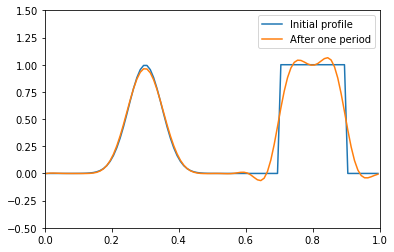

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
plt.ion()

#The essential parameters for the problem
N_cells = 100  #the number of cells. 
N = N_cells+1  #N+1 is the number of cell edges.
CFL = 0.1  #CFL number
dx = 1.0/N_cells  #grid spacing
sig = 0.05  #sigma for the gaussian in the initial function
v = 1.0
CFL = 0.1
dt = CFL*dx/v
T = 1/v #Length of domain in code units is 1.0

x = np.arange(0,1+dx,dx)  #The cell edges
f_avg_arr = np.zeros(N_cells)  #stores N-1 initial cell averaged values
f_avg_final = np.zeros(N_cells) #stores N-1 final cell averaged values

#function to define the initial closed form profile (non-averaged)
def f_init_gaussianonly(x):
    return np.exp((-(x-0.3)**2)/(2*(sig**2)))

#function constructing the tophat profile
def f_init_gauss_tophat(x):
    if(x <= 0.6): return f_init_gaussianonly(x)
    else:
        if(x >= 0.7 and x <= 0.9): return 1.0
        else: return 0.0
    
    return init_profile
        
#f_avg_arr = f_init_gauss_tophat(x)

#function to calculate the cell averaged values before beginning time iterations
def f_init_avg(x, f_choice):
    for i in range(N-1):  #this is the number of cells
        
        #averaging the function between cell edges
        if (f_choice == 1): f_avg = integrate.quad(f_init_gaussianonly,x[i],x[i+1]) #gaussian profile
        else: f_avg = integrate.quad(f_init_gauss_tophat,x[i],x[i+1])   #gaussian and top hat
        f_avg_arr[i] = f_avg[0]/dx  #the values are for the cells centered at (x[i]+x[i+1])/2
 
    return f_avg_arr
        
#function to evaluate the flux discretized flux depeding on the choice of scheme 
def flux_discr(phi, scheme):
    phi_jp1 = phi[np.arange(1,N_cells+1,1)%N_cells]	#making necessary adjustments to 
    phi_jm1 = phi[np.arange(-1,N_cells-1,1)%N_cells]	#enforce the periodic B.C
    phi_jm2 = phi[np.arange(-2,N_cells-2,1)%N_cells]

    #second order centered
    if(scheme == 1): flux = -v*(phi_jp1 - phi_jm1)/(2*dx)
    #first order upwind
    elif(scheme == 2): flux = -v*(phi - phi_jm1)/dx
    #third order upwind biased
    elif(scheme == 3): flux = -v*(phi/2.0 + phi_jp1/3.0 - phi_jm1 + phi_jm2/6.0)/dx
        
    else: print ('Wrong choice!')
        
    return flux

#time stepping
def ssprk3(phi,scheme):
    t = 0
    while(t<T):
        phi_np1 = np.zeros(len(phi))
        phi1 = np.zeros(len(phi))
        phi2 = np.zeros(len(phi))
        
        phi1 = phi + dt*flux_discr(phi,scheme)

        phi2 = 0.75*phi + 0.25*(phi1 + dt*flux_discr(phi1,scheme))
        
        phi_np1 = (1.0/3.0)*phi + (2.0/3.0)*(phi2 + dt*flux_discr(phi2,scheme))
        phi = phi_np1  ##reassigning phi with the phi at next time step
        
        t += dt
        
    return phi
    
#calculating the cell averages
f_avg_arr = f_init_avg(x,2)

#obtaining the final time step result
f_avg_final = ssprk3(f_avg_arr,3)

#plotting and comparing the initial and final results after one full period
plt.plot(x[1:]-0.5*dx,f_avg_arr,label='Initial profile')  #plotting the initial profile
plt.plot(x[1:]-0.5*dx,f_avg_final,label='After one period')  #plotting the final profile
plt.ylim([-0.5,1.5])
plt.xlim([0,1])
plt.legend()
#plt.title('Second order centered, SSPRK3, CFL = 0.1')

In [30]:
dt

0.001